In [1]:
from bs4 import BeautifulSoup
import requests
import csv
import time
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
source = requests.get('https://www.imdb.com/list/ls009487211/?st_dt=&mode=detail&sort=list_order,asc&page=1').text

In [3]:
soup = BeautifulSoup(source, 'lxml')
# print(soup.prettify())

In [4]:
movie = soup.find(class_='lister-item-content')
type(movie)

bs4.element.Tag

In [5]:
title = movie.find('a', href_='').text.strip()
print(title)

Kẻ Du Mục


In [6]:
year = movie.find('span', class_='lister-item-year').text.strip('I) (')
print(year)

2020


In [7]:
rating = movie.find('div', class_='ipl-rating-star small').text.strip()
print(rating)

7.3


In [8]:
genre = movie.find('span', class_='genre').text.strip()
print(genre)

Drama


In [9]:
description = movie.find('p', class_='').text.strip()
print(description)

A woman in her sixties, after losing everything in the Great Recession, embarks on a journey through the American West, living as a van-dwelling modern-day nomad.


In [35]:
revenue = movie.find('span', {'name':'nv'}).text.strip()
print(revenue)

472,501


In [36]:
pages = [1, 2, 3, 4, 5]

with open('/Users/benja/Downloads/movie.csv', 'a', encoding='utf-8', newline='') as f_output:
    csv_print = csv.writer(f_output)
    
    file_is_empty = os.stat('/Users/benja/Downloads/movie.csv').st_size == 0
    if file_is_empty:
        csv_print.writerow(['title', 'year', 'rating', 'genre', 'description', 'revenue'])

    for page in pages:
        source = requests.get('https://www.imdb.com/list/ls009487211/?st_dt=&mode=detail&sort=list_order,asc&page={}'.format(page)).text

        soup = BeautifulSoup(source, 'lxml')
    
        for movie in soup.find_all(class_='lister-item-content'):  
    
                try:
                    title = movie.find('a', href_='').text.strip()
                except Exception as e:
                    title = None
                print('Title      :', title)
    
                try:
                    year = movie.find('span', class_='lister-item-year').text.strip('I) (')
                except Exception as e:
                    year = None
                print('Year       :', year)
    
                try:
                    rating = movie.find('div', class_='ipl-rating-star small').text.strip()
                except Exception as e:
                    rating = None
                print('Rating     :', rating)
    
                try:
                    genre = movie.find('span', class_='genre').text.strip()
                except Exception as e:
                    genre = None
                print('Genre      :', genre)
    
                try:
                    description = movie.find('p', class_='').text.strip()
                except Exception as e:
                    description = None
                print('Description:', description)
                
                try:
                    revenue = movie.find_all('span', {'name':'nv'})[1].text.strip()
                    
                except Exception as e:
                    pass
                
                csv_print.writerow([title, year, rating, genre, description, revenue])
                
                print('------------------------------------------------------------------------------')
            
                time.sleep(0.5)

data = pd.read_csv('/Users/benja/Downloads/movie.csv')
data.head(10)

Title      : Kẻ Du Mục
Year       : 2020
Rating     : 7.3
Genre      : Drama
Description: A woman in her sixties, after losing everything in the Great Recession, embarks on a journey through the American West, living as a van-dwelling modern-day nomad.
------------------------------------------------------------------------------
Title      : The Father
Year       : 2020
Rating     : 8.2
Genre      : Drama, Mystery
Description: A man refuses all assistance from his daughter as he ages. As he tries to make sense of his changing circumstances, he begins to doubt his loved ones, his own mind and even the fabric of his reality.
------------------------------------------------------------------------------
Title      : Băng Đảng Báo Đen
Year       : 2021
Rating     : 7.4
Genre      : Biography, Drama, History
Description: Offered a plea deal by the FBI, William O'Neal infiltrates the Illinois chapter of the Black Panther Party to gather intelligence on Chairman Fred Hampton.
---------------

In [39]:
data.shape

(498, 6)

In [56]:
data.columns

Index(['title', 'year', 'rating', 'genre', 'description', 'revenue'], dtype='object')

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 6 columns):
title          498 non-null object
year           498 non-null int64
rating         498 non-null float64
genre          498 non-null object
description    498 non-null object
revenue        498 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 23.4+ KB


In [58]:
print("Average Rating: ", round(data['rating'].mean(),1))

Average Rating:  7.7


In [66]:
data.sort_values(['rating'],ascending=False)[:11]

,title,year,rating,genre,description,revenue
197,Nhà tù Shawshank,1994,9.3,Drama,Two imprisoned men bond over a number of years...,$28.34M
303,Bố Già,1972,9.2,"Crime, Drama",The aging patriarch of an organized crime dyna...,$134.97M
148,Chúa Tể Của Những Chiếc Nhẫn: Sự Quay Trở Lại ...,2003,9.0,"Action, Adventure, Drama",Gandalf and Aragorn lead the World of Men agai...,$377.85M
293,Bố Già Phần II,1974,9.0,"Crime, Drama",The early life and career of Vito Corleone in ...,$57.30M
198,Bản Danh Sách Của Schindler,1993,9.0,"Biography, Drama, History","In German-occupied Poland during World War II,...",$96.90M
381,12 Angry Men,1957,9.0,"Crime, Drama",The jury in a New York City murder trial is fr...,$4.36M
195,Chuyện Tào Lao,1994,8.9,"Crime, Drama","The lives of two mob hitmen, a boxer, a gangst...",$107.93M
193,Cuộc Đời Forrest Gump,1994,8.8,"Drama, Romance","The presidencies of Kennedy and Johnson, the V...",$330.25M
108,Kẻ Đánh Cắp Giấc Mơ,2010,8.8,"Action, Adventure, Sci-Fi",A thief who steals corporate secrets through t...,$292.58M
156,Chúa Tể Của Những Chiếc Nhẫn: Hai Tòa Tháp,2002,8.8,"Action, Adventure, Drama",While Frodo and Sam edge closer to Mordor with...,$342.55M


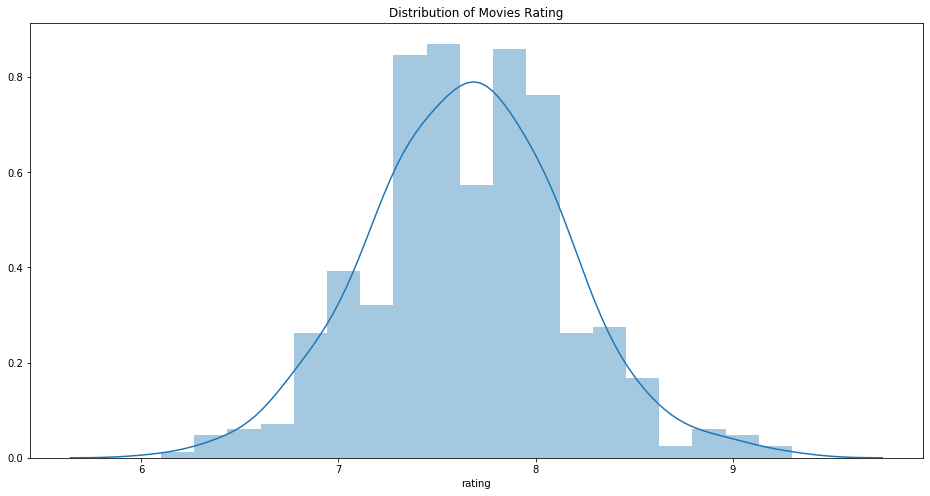

In [69]:
plt.figure(figsize=(16,8))
sns.distplot(data['rating'])
plt.title('Distribution of Movies Rating')
plt.show()